In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import optim

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 63),
            nn.ReLU(),
            nn.Linear(63, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        code = self.encoder(x)
        return self.decoder(code)

In [3]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        # print(x.shape)
        code = self.encoder(x)
        # print(code.shape)
        return self.decoder(code)

In [4]:
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=transforms.ToTensor())

In [5]:
model = ConvAutoencoder()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
train_loader = DataLoader(train_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

In [9]:
def train_loop(model, loader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for X, _ in loader:
        X = X.to(device)
        reconstructed = model(X)
        # loss = loss_fn(reconstructed, X.reshape(X.shape[0], -1))
        loss = loss_fn(reconstructed, X)
        loss.backward()
        total_loss += loss.item()

        optimizer.step()
        optimizer.zero_grad()
    print(total_loss / len(loader))

In [10]:
def test_loop(model, loader, loss_fn, device):
    model.eval()
    with torch.no_grad():
        total_loss = 0
        for X, _ in loader:
            X = X.to(device)
            reconstructed = model(X)
            # loss = loss_fn(reconstructed, X.reshape(X.shape[0], -1))
            loss = loss_fn(reconstructed, X)
            total_loss += loss.item()
        print(total_loss / len(loader))

In [11]:
for epoch in range(10):
    train_loop(model, train_loader, loss_fn, optimizer, device)
    test_loop(model, test_loader, loss_fn, device)

0.0019427097044703461
0.00013869134070059944
9.749650826342831e-05
0.00023924208893086996
6.498078842198592e-05
9.50442116834294e-05
5.4724950855697144e-05
0.0013208421082766372
5.181279567995919e-05
5.0742407150705094e-05
3.419570014330505e-05
0.00010141631125257339
3.065082201539829e-05
0.00013972701607242556
2.749306402810321e-05
4.533311419183082e-05
0.00021205559227700796
6.408432666750189e-05
4.3398652833314046e-05
3.888383273792724e-05


In [12]:
model.eval()
X, _ = test_dataset[0]
encoded = model.encoder(X.to(device).view(1, 1, 28, 28))
encoded

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [14]:
decoded = model.decoder(encoded)
# decoded = model.decoder(new_random)

In [15]:
from matplotlib import pyplot as plt

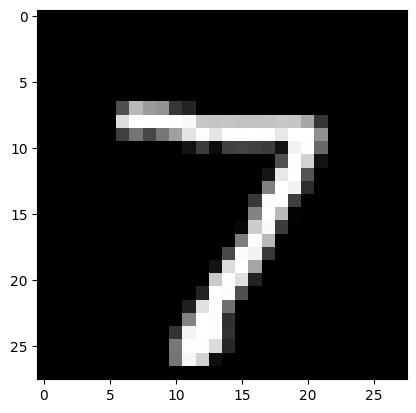

In [16]:
plt.imshow(decoded.reshape(28,28).cpu().detach().numpy(), cmap='gray')

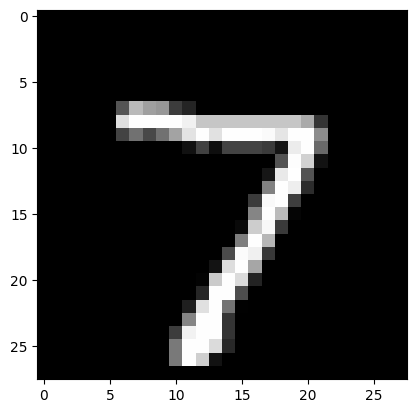

In [17]:
plt.imshow(X.reshape(28,28), cmap='gray')